In [60]:
# Upload the file into Colab Notebook
from google.colab import files
file=files.upload()

Saving uber_reviews_without_reviewid.csv to uber_reviews_without_reviewid (1).csv


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df_uber=pd.read_csv('uber_reviews_without_reviewid.csv')
df_uber.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [62]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


In [63]:
# checkin the empty value in percentage
df_uber.isna().mean()*100

,0
userName,0.000
userImage,100.000
content,0.000
score,0.000
thumbsUpCount,0.000
reviewCreatedVersion,14.500
at,0.000
replyContent,99.725
repliedAt,99.725
appVersion,14.500


In [64]:
#remove unneccesary columns
df_uber.drop(columns=['userName','userImage','replyContent','repliedAt'],inplace=True)
df_uber.head()


,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005
1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005
2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001
3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005


In [65]:
# fill the missing values in reviewCreatedVersion and appVersion
df_uber['reviewCreatedVersion'].fillna(df_uber['reviewCreatedVersion'].mode()[0],inplace=True)
df_uber['appVersion'].fillna(df_uber['appVersion'].mode()[0],inplace=True)
df_uber.isna().sum()

,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


In [66]:
df_uber['content'].value_counts()

,count
content,
Good,985
Nice,309
Excellent,205
Good service,179
Very good,171
...,...
"UBER Service in Belgaum location is available only for name sake..The moment you try to book uber auto, no service is available.. Please provide all services first and then inform that UBER service available at Belgaum.",1
"Uber driver, dropped my nephew off miles from the where is supposed to take him. Made him get out of the car. I have been trying to for 3 days to get a person on the phone. The customer service people are not taking this seriously.",1
Amazing ride sharing app.,1


# implementing preprocessing on content feature


In [67]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk



In [68]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Remove Noise:
## Uses regular expressions to remove emojis, special characters, and numbers.

In [69]:
df_uber['content'] = df_uber['content'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df_uber['content'] = df_uber['content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df_uber['content'] = df_uber['content'].apply(lambda x: re.sub(r'\d+', '', x))
df_uber['content']

,content
0,Good
1,Nice
2,Very convenient
3,Good
4,exllence
...,...
11995,Excellent
11996,Worst experience after pm in Hyde cityno auto ...
11997,Exceptional
11998,Good Service


# Standardize Text (convert to lowercase)

In [70]:
df_uber['content'] = df_uber['content'].apply(lambda x: x.lower())
df_uber['content']

,content
0,good
1,nice
2,very convenient
3,good
4,exllence
...,...
11995,excellent
11996,worst experience after pm in hyde cityno auto ...
11997,exceptional
11998,good service


# Correct Spelling Errors

In [71]:
pip install symspellpy

In [72]:
from symspellpy import SymSpell, Verbosity
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_text_with_symspell(text):
    corrected_text = []
    for word in text.split():
        # Lookup suggestions for each word
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        # If there are suggestions, take the most probable one; otherwise, keep the word as is
        if suggestions:
            corrected_text.append(suggestions[0].term)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

df_uber['content'] = df_uber['content'].apply(correct_text_with_symspell)
df_uber['content']

2024-12-27 07:58:45,237: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


,content
0,good
1,nice
2,very convenient
3,good
4,exllence
...,...
11995,excellent
11996,worst experience after pm in hyde cityno auto ...
11997,exceptional
11998,good service


# Remove Stopwords

## Stopwords are common words in a language that are usually filtered out in text preprocessing.
### Examples of Stopwords in English
### Articles: "a", "an", "the"
### Pronouns: "he", "she", "it", "they", "we"
### Prepositions: "in", "on", "at", "with", "by"
### Conjunctions: "and", "but", "or"
### Auxiliary Verbs: "is", "are", "was", "were", "be"
### Others: "this", "that", "there", "here", "what", "where", "when"

In [73]:
df_uber['content'] = df_uber['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
df_uber['content']

,content
0,good
1,nice
2,convenient
3,good
4,exllence
...,...
11995,excellent
11996,worst experience pm hyde cityno auto taking ride
11997,exceptional
11998,good service


# Lemmatization is the process of reducing a word to its base or dictionary form, called a lemma, while preserving its meaning.
## Original Words:
### "running" → Lemma: "run"
### "better" → Lemma: "good" (uses context to determine meaning)
### "mice" → Lemma: "mouse"

In [74]:
lemmatizer = WordNetLemmatizer()
df_uber['content'] = df_uber['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df_uber['content']

,content
0,good
1,nice
2,convenient
3,good
4,exllence
...,...
11995,excellent
11996,worst experience pm hyde cityno auto taking ride
11997,exceptional
11998,good service


In [75]:
df_uber['content'].value_counts()

,count
content,
good,1477
nice,442
good service,284
excellent,259
,228
...,...
worst application useless promotional banner app rider never book time matter increase price totally hated application,1
bad service bangladesh,1
collecting bill amount driver coming accepting request canceling due unavailability driver driver responding cancellation charge collected driver coming late accepting drive request better avoid uber usage really bad experience uber,1


In [76]:
df_uber['reviewCreatedVersion'].value_counts()

,count
reviewCreatedVersion,
4.554.10001,4927
4.555.10003,2327
4.556.10005,1699
4.553.10000,1667
4.552.10000,285
...,...
4.289.10003,1
4.420.10002,1
4.312.10001,1


In [77]:
df_uber['appVersion'].value_counts()

,count
appVersion,
4.554.10001,4927
4.555.10003,2327
4.556.10005,1699
4.553.10000,1667
4.552.10000,285
...,...
4.289.10003,1
4.420.10002,1
4.312.10001,1


In [78]:
df_uber['score'].value_counts()

,count
score,
5,7926
1,2618
4,806
3,333
2,317


In [79]:
df_uber['at'].value_counts()

,count
at,
2024-12-13 15:58:40,3
2024-11-29 09:51:48,2
2024-12-01 21:08:01,2
2024-12-12 19:12:40,2
2024-11-29 17:27:16,2
...,...
2024-12-10 03:01:00,1
2024-12-10 02:58:34,1
2024-12-10 02:56:30,1


## Extarct new feature from at.

In [80]:
# convert at to date datatype
df_uber['at'] = pd.to_datetime(df_uber['at'])

#extract features
df_uber['month'] = df_uber['at'].dt.month
df_uber['day'] = df_uber['at'].dt.day
df_uber['date']=df_uber['at'].dt.date
df_uber['hour'] = df_uber['at'].dt.hour
df_uber['time']=df_uber['at'].dt.time
df_uber['day of week']=df_uber['at'].dt.day_name()
df_uber['Part of day']=pd.cut(df_uber['hour'],bins=[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_uber.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,month,day,date,hour,time,day of week,Part of day
0,good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005,12,18,2024-12-18,17,17:17:19,Wednesday,Afternoon
1,nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005,12,18,2024-12-18,17,17:17:17,Wednesday,Afternoon
2,convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001,12,18,2024-12-18,17,17:09:42,Wednesday,Afternoon
3,good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005,12,18,2024-12-18,17,17:08:27,Wednesday,Afternoon
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005,12,18,2024-12-18,17,17:08:16,Wednesday,Afternoon


In [81]:
#remove the date and time feature
df_uber.drop(columns=['date','time'],inplace=True)
df_uber.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,month,day,hour,day of week,Part of day
0,good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005,12,18,17,Wednesday,Afternoon
1,nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005,12,18,17,Wednesday,Afternoon
2,convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001,12,18,17,Wednesday,Afternoon
3,good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005,12,18,17,Wednesday,Afternoon
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005,12,18,17,Wednesday,Afternoon


In [82]:
df_uber['month'].value_counts()

,count
month,
12,8782
11,3218


In [83]:
df_uber['Part of day'].value_counts()

,count
Part of day,
Afternoon,3417
Evening,3073
Morning,2973
Night,2043


In [84]:
df_uber['Part of day'].isna().sum()

494

In [85]:
# retrieve data where part of day is na
df_uber[df_uber['Part of day'].isna()]

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,month,day,hour,day of week,Part of day
266,website deducted r account reason even used ap...,2,0,4.554.10001,2024-12-18 00:59:56,4.554.10001,12,18,0,Wednesday,NaN
267,show detail rider rating,1,0,4.556.10005,2024-12-18 00:58:26,4.556.10005,12,18,0,Wednesday,NaN
268,good,5,0,4.554.10001,2024-12-18 00:57:12,4.554.10001,12,18,0,Wednesday,NaN
269,driver listened suggestion also got destinatio...,5,0,4.554.10001,2024-12-18 00:56:56,4.554.10001,12,18,0,Wednesday,NaN
270,tipped cash app sent u weiner konzerthaus inst...,5,0,4.548.10001,2024-12-18 00:55:47,4.548.10001,12,18,0,Wednesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11940,wrost app earth scammer,1,0,4.554.10001,2024-11-25 00:07:39,4.554.10001,11,25,0,Monday,NaN
11941,excelente gracias,5,0,4.546.10002,2024-11-25 00:06:22,4.546.10002,11,25,0,Monday,NaN
11942,convenient,5,0,4.554.10001,2024-11-25 00:02:20,4.554.10001,11,25,0,Monday,NaN
11943,good,5,0,4.553.10000,2024-11-25 00:00:56,4.553.10000,11,25,0,Monday,NaN


In [86]:
#replace part of day with Night
df_uber['Part of day'].fillna('Night',inplace=True)
df_uber['Part of day'].isna().sum()

0

In [87]:
df_uber['day of week'].value_counts()

,count
day of week,
Monday,2040
Tuesday,1997
Wednesday,1837
Sunday,1627
Saturday,1569
Friday,1514
Thursday,1416


In [88]:
df_uber['month'].value_counts()

,count
month,
12,8782
11,3218


In [89]:
df_uber['hour'].value_counts()

,count
hour,
22,667
19,631
20,626
16,616
21,601
17,578
13,575
18,567
11,560


In [90]:
df_uber['thumbsUpCount'].value_counts()

,count
thumbsUpCount,
0,11448
1,279
2,79
3,36
4,18
...,...
19,1
20,1
69,1


In [91]:
# covert into object
df_uber['at']=df_uber['at'].astype(str)


In [92]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   content               12000 non-null  object  
 1   score                 12000 non-null  int64   
 2   thumbsUpCount         12000 non-null  int64   
 3   reviewCreatedVersion  12000 non-null  object  
 4   at                    12000 non-null  object  
 5   appVersion            12000 non-null  object  
 6   month                 12000 non-null  int32   
 7   day                   12000 non-null  int32   
 8   hour                  12000 non-null  int32   
 9   day of week           12000 non-null  object  
 10  Part of day           12000 non-null  category
dtypes: category(1), int32(3), int64(2), object(5)
memory usage: 808.9+ KB


# EDA

([0, 1, 2, 3, 4],
 [Text(0, 0, '4.554.10001'),
  Text(1, 0, '4.555.10003'),
  Text(2, 0, '4.556.10005'),
  Text(3, 0, '4.553.10000'),
  Text(4, 0, '4.552.10000')])

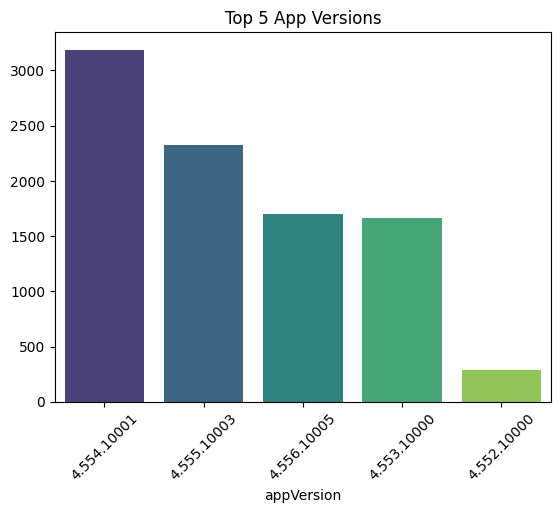

In [ ]:
top_versions = df_uber['appVersion'].value_counts().nlargest(5)
sns.barplot(x=top_versions.index, y=top_versions.values, palette='viridis')
plt.title('Top 5 App Versions')
plt.xticks(rotation=45)

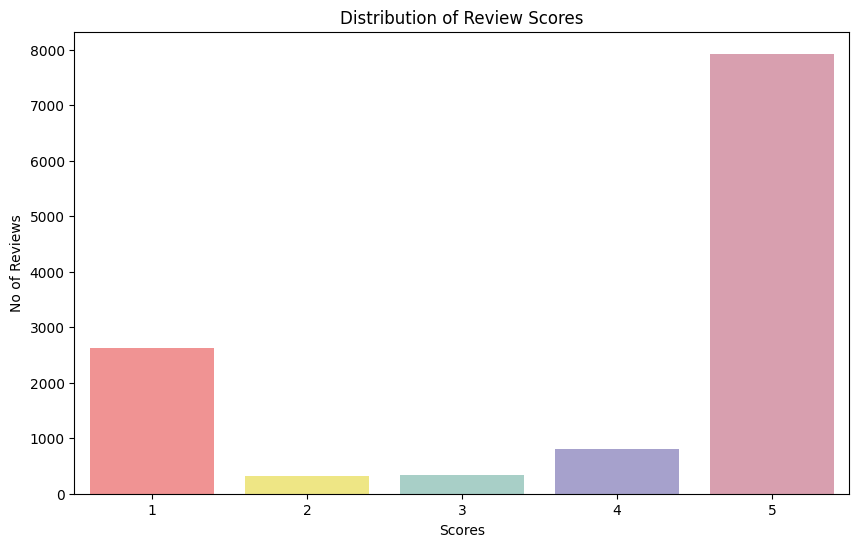

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_uber, x='score', palette=['#FF8383','#FFF574','#A1D6CB','#A19AD3','#E195AB'])
plt.title('Distribution of Review Scores')
plt.xlabel('Scores')
plt.ylabel('No of Reviews')
plt.show()

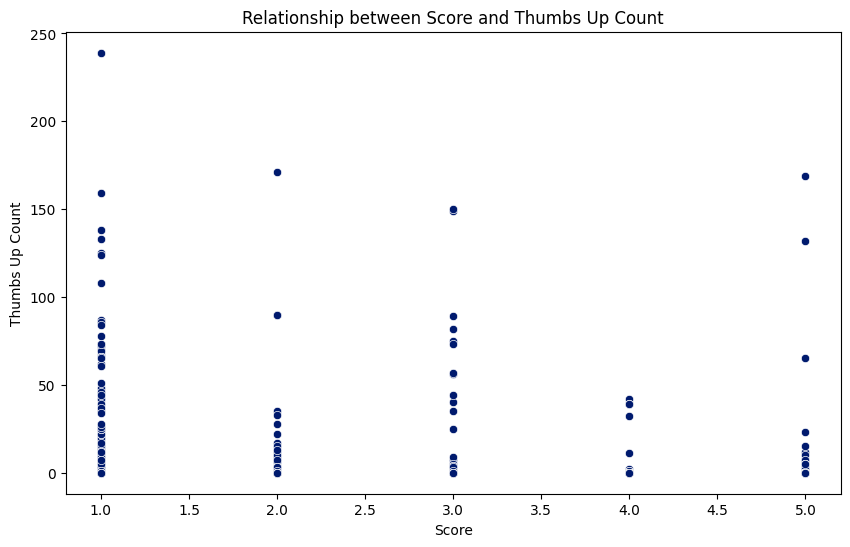

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_uber, x='score', y='thumbsUpCount',color=['#001A6E'])
plt.title('Relationship between Score and Thumbs Up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.show()

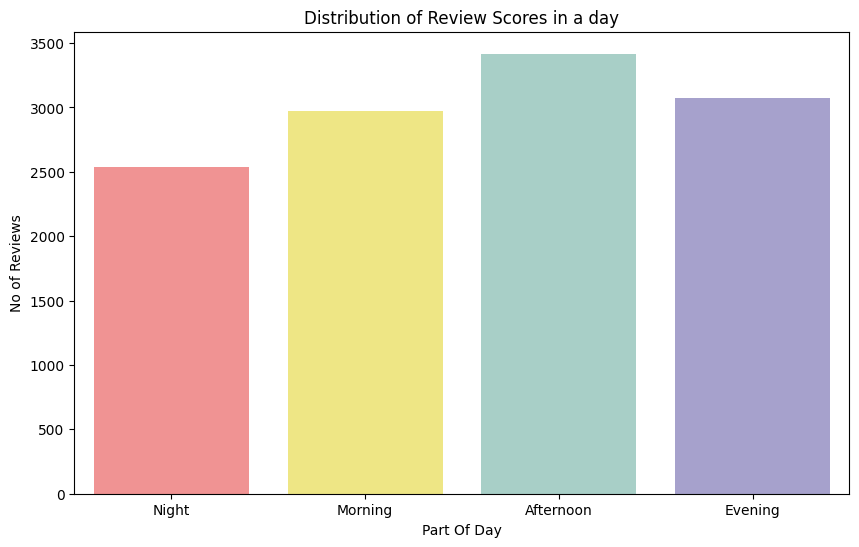

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_uber, x='Part of day', palette=['#FF8383','#FFF574','#A1D6CB','#A19AD3','#E195AB'])
plt.title('Distribution of Review Scores in a day')
plt.xlabel('Part Of Day')
plt.ylabel('No of Reviews')
plt.show()

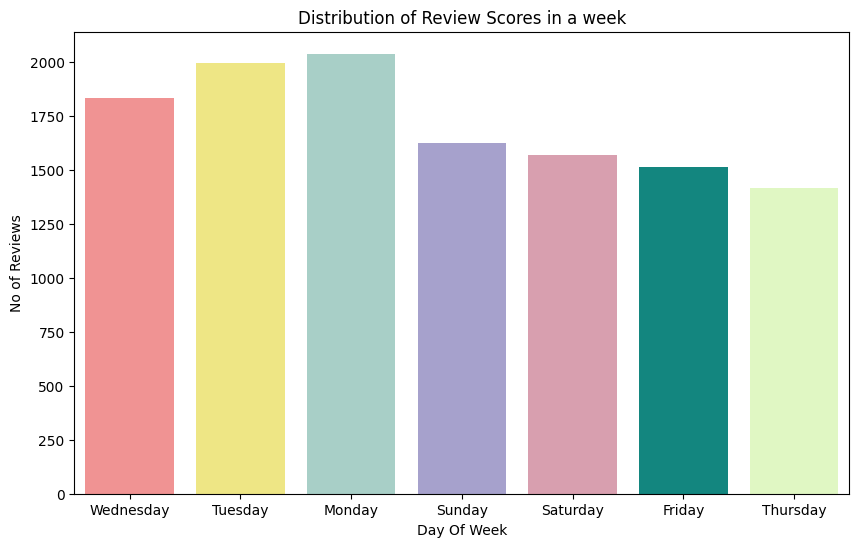

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_uber, x='day of week', palette=['#FF8383','#FFF574','#A1D6CB','#A19AD3','#E195AB','#009990','#E1FFBB'])
plt.title('Distribution of Review Scores in a week')
plt.xlabel('Day Of Week')
plt.ylabel('No of Reviews')
plt.show()

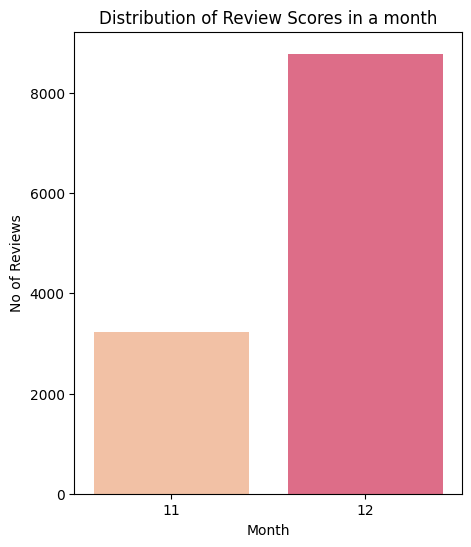

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df_uber, x='month', palette=['#FFBE98','#F05A7E'])
plt.title('Distribution of Review Scores in a month')
plt.xlabel('Month')
plt.ylabel('No of Reviews')
plt.show()


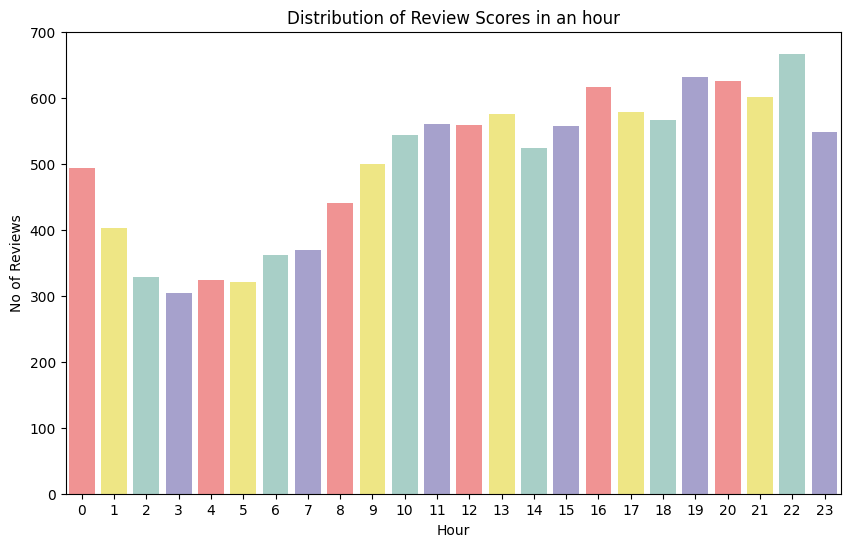

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_uber, x='hour', palette=['#FF8383','#FFF574','#A1D6CB','#A19AD3'])
plt.title('Distribution of Review Scores in an hour')
plt.xlabel('Hour')
plt.ylabel('No of Reviews')
plt.show()

In [94]:
!pip install wordcloud
from wordcloud import WordCloud

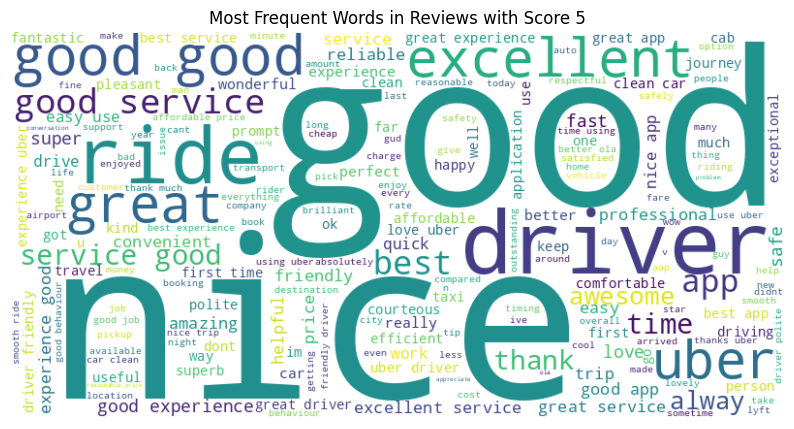

In [95]:
positive_reviews = df_uber[df_uber['score'] == 5]['content']

positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews with Score 5')
plt.show()

In [96]:
positive_reviews.value_counts()

,count
content,
good,1271
nice,404
good service,262
excellent,252
,177
...,...
reliable safe service,1
noice app,1
new update u pathetic,1


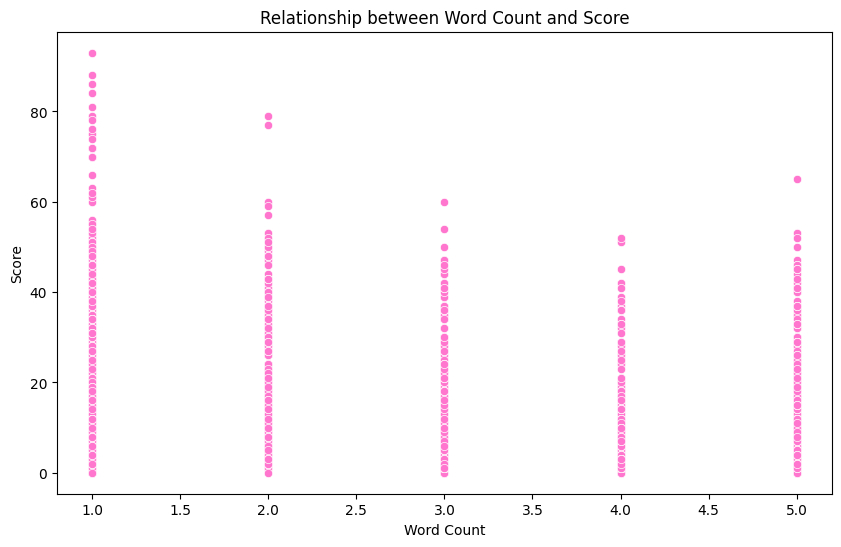

In [ ]:
#nof words in content vs score
word_count = df_uber['content'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_uber['score'], y=word_count,color=['#FF76CE'])
plt.title('Relationship between Word Count and Score')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.show()

In [ ]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   content               12000 non-null  object  
 1   score                 12000 non-null  int64   
 2   thumbsUpCount         12000 non-null  int64   
 3   reviewCreatedVersion  12000 non-null  object  
 4   at                    12000 non-null  object  
 5   appVersion            12000 non-null  object  
 6   month                 12000 non-null  int32   
 7   day                   12000 non-null  int32   
 8   hour                  12000 non-null  int32   
 9   day of week           12000 non-null  object  
 10  Part of day           12000 non-null  category
dtypes: category(1), int32(3), int64(2), object(5)
memory usage: 808.9+ KB


In [ ]:
# Convert score to sentiment labels
def get_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_uber['sentiment'] = df_uber['score'].apply(get_sentiment)

In [ ]:
df_uber['sentiment'].value_counts()

,count
sentiment,
Positive,8732
Negative,2935
Neutral,333


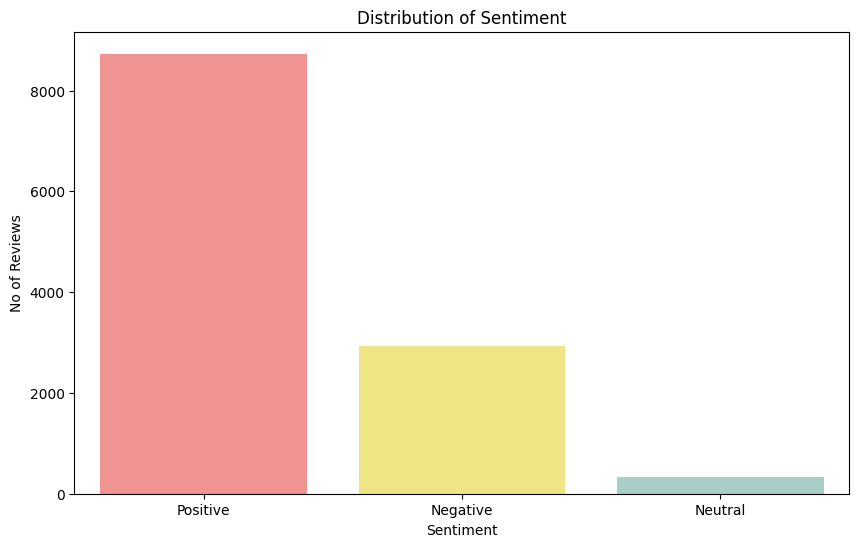

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_uber, x='sentiment', palette=['#FF8383','#FFF574','#A1D6CB','#A19AD3','#E195AB'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('No of Reviews')
plt.show()

In [ ]:
#check the spearmen coorelation
df_uber.corr(method='spearman',numeric_only=True)

,score,thumbsUpCount,month,day,hour
score,1.000000,-0.292170,-0.034904,0.011097,-0.002932
thumbsUpCount,-0.292170,1.000000,0.026736,-0.029644,-0.023806
month,-0.034904,0.026736,1.000000,-0.767997,-0.032338
day,0.011097,-0.029644,-0.767997,1.000000,0.006584
hour,-0.002932,-0.023806,-0.032338,0.006584,1.000000


In [ ]:
#remove numeric columns
df_uber.drop(columns=['score','thumbsUpCount','month','day','hour'],inplace=True)
df_uber.head()

,content,reviewCreatedVersion,at,appVersion,day of week,Part of day,sentiment
0,good,4.556.10005,2024-12-18 17:17:19,4.556.10005,Wednesday,Afternoon,Positive
1,nice,4.556.10005,2024-12-18 17:17:17,4.556.10005,Wednesday,Afternoon,Positive
2,convenient,4.532.10001,2024-12-18 17:09:42,4.532.10001,Wednesday,Afternoon,Positive
3,good,4.556.10005,2024-12-18 17:08:27,4.556.10005,Wednesday,Afternoon,Positive
4,exllence,4.556.10005,2024-12-18 17:08:16,4.556.10005,Wednesday,Afternoon,Positive


In [ ]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   content               12000 non-null  object  
 1   reviewCreatedVersion  12000 non-null  object  
 2   at                    12000 non-null  object  
 3   appVersion            12000 non-null  object  
 4   day of week           12000 non-null  object  
 5   Part of day           12000 non-null  category
 6   sentiment             12000 non-null  object  
dtypes: category(1), object(6)
memory usage: 574.5+ KB


In [ ]:
#check the relation of other columns with sentiment using chisquare test
from scipy.stats import chi2_contingency
categorical_columns = df_uber.select_dtypes(include=['object']).columns
for column in categorical_columns:
    contingency_table = pd.crosstab(df_uber[column], df_uber['sentiment'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for '{column}' and 'sentiment':")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

    if p < 0.05:
        print("There is a significant association between the two variables.")
    else:
        print("There is no significant association between the two variables.")
    print()


Chi-square test for 'content' and 'sentiment':
Chi-square statistic: 21837.505811916602
P-value: 0.0
There is a significant association between the two variables.

Chi-square test for 'reviewCreatedVersion' and 'sentiment':
Chi-square statistic: 485.40425416228305
P-value: 5.559100818226516e-13
There is a significant association between the two variables.

Chi-square test for 'at' and 'sentiment':
Chi-square statistic: 23936.681647431506
P-value: 0.42503359744591707
There is no significant association between the two variables.

Chi-square test for 'appVersion' and 'sentiment':
Chi-square statistic: 485.40425416228305
P-value: 5.559100818226516e-13
There is a significant association between the two variables.

Chi-square test for 'day of week' and 'sentiment':
Chi-square statistic: 15.805599681475906
P-value: 0.200303083462933
There is no significant association between the two variables.

Chi-square test for 'sentiment' and 'sentiment':
Chi-square statistic: 24000.0
P-value: 0.0
There

In [ ]:
# remove the column if p value is above 0.05
df_uber.drop(columns=['Part of day','day of week','appVersion','reviewCreatedVersion','at'],inplace=True)
df_uber.head()

,content,sentiment
0,good,Positive
1,nice,Positive
2,convenient,Positive
3,good,Positive
4,exllence,Positive


# Data wrangling

## TF-IDF (Term Frequency-Inverse Document Frequency) is primarily designed for text data, making it suitable for the content feature in your dataset.
## TF-IDF captures the importance of words in the content column across all reviews.
## Converts text into a numerical format for machine learning models.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X=df_uber['content']
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(X).toarray()
y=df_uber['sentiment']


# implementing classification model

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


lg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy Score:  0.9183333333333333
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.87      0.86       554
     Neutral       0.00      0.00      0.00        80
    Positive       0.94      0.98      0.96      1766

    accuracy                           0.92      2400
   macro avg       0.60      0.61      0.60      2400
weighted avg       0.89      0.92      0.90      2400



In [ ]:
# decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8683333333333333


In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))


Accuracy Score:  0.905


In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.92375


In [ ]:
#naive baiyes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))


Accuracy Score:  0.9175


In [ ]:
#gradient boositng
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
#gradient boositng
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.87875


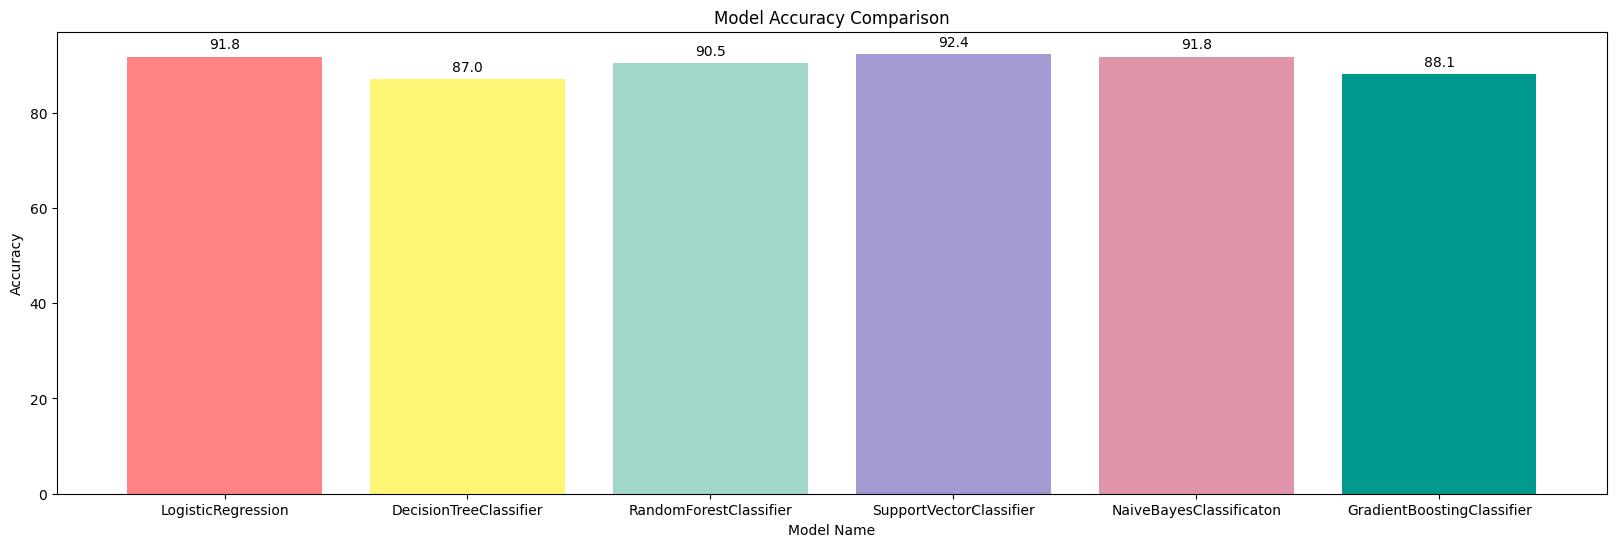

In [ ]:
model_name=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","SupportVectorClassifier","NaiveBayesClassificaton","GradientBoostingClassifier"]
Accuracy=[91.8,87.0,90.5,92.4,91.8,88.1]
plt.figure(figsize=(20,6))
plt.bar(model_name,Accuracy,color=['#FF8383','#FFF574','#A1D6CB','#A19AD3','#E195AB','#009990'])
for i, value in enumerate(Accuracy):
    plt.text(i, value + 1,  # Position: x=i, y=value+1 (a little above the bar)
             str(value),    # Text to display
             ha='center',   # Horizontal alignment
             va='bottom',   # Vertical alignment
             fontsize=10)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()